### 1. LOAD LIBRARIES

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
cpi = './CPI.csv' # Consumer price index
eci = './ECI.csv' #  Employment cost index
csi = './CONSUMER-SENTIMENT-INDEX.csv' # Consumer sentiment index
gpd = './GPD-PRICE-DEFLATOR.csv' # Price deflator
ipd = './IMPORT-PRICE-INDEX.csv' # Import price index
op = './OIL-PRICE.csv' # WPI oil prices
pce = './PCE.csv' # Personal consumption expenditures
ppi = './PPI.csv' # Producer price index
wg = './WAGE-GROWTH.csv' # Wage growth

In [79]:
df_cpi = pd.read_csv(cpi, index_col='DATE', parse_dates=True)
df_eci = pd.read_csv(eci, index_col='DATE', parse_dates=True)
df_csi = pd.read_csv(csi)
df_gpd = pd.read_csv(ipd, index_col='DATE', parse_dates=True)
df_op = pd.read_csv(op, index_col='DATE', parse_dates=True)
df_pce = pd.read_csv(pce, index_col='DATE', parse_dates=True)
df_ppi = pd.read_csv(ppi, index_col='DATE', parse_dates=True)
df_wg = pd.read_csv(wg, index_col='DATE', parse_dates=True)

### 2. DATA EXPLORATION

In [80]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [81]:
# cpi data
df_cpi # we nneed to check outliers to determine a propriate agg method to use

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-01-01,309.685
2024-02-01,311.054
2024-03-01,312.230


In [82]:
check_outliers(df_cpi, 'CPIAUCSL') # no outliers, so we use mean

,CPIAUCSL
DATE,


In [83]:
df_cpi.resample('Q').mean()

/var/folders/t_/8l_2cmsj4ys5cqvg9j6rjk100000gn/T/ipykernel_2877/901943412.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_cpi.resample('Q').mean()


,CPIAUCSL
DATE,
1947-03-31,21.700000
1947-06-30,22.010000
1947-09-30,22.490000
1947-12-31,23.126667
1948-03-31,23.616667
...,...
2023-06-30,303.466667
2023-09-30,306.034333
2023-12-31,308.099000


In [84]:
df_eci

,CIS1020000000000I
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7
...,...
2023-01-01,157.1
2023-04-01,158.7
2023-07-01,160.4


In [85]:
df_gpd.replace('.', np.nan,  inplace=True)

In [86]:
df_gpd.isnull().sum()

IR    50
dtype: int64

In [87]:
df_gpd.dropna(inplace=True)

In [88]:
df_gpd['IR'] = df_gpd['IR'].astype('float64')

In [89]:
check_outliers(df_gpd, 'IR')

,IR
DATE,


In [90]:
df_op

,POILWTIUSDM
DATE,
1990-01-01,22.604348
1990-02-01,22.202500
1990-03-01,20.440455
1990-04-01,18.526667
1990-05-01,18.443043
...,...
2024-01-01,74.003043
2024-02-01,77.363810
2024-03-01,81.405714


In [91]:
check_outliers(df_op, 'POILWTIUSDM')

,POILWTIUSDM
DATE,


In [92]:
df_pce

,PCE
DATE,
1959-01-01,306.1
1959-02-01,309.6
1959-03-01,312.7
1959-04-01,312.2
1959-05-01,316.1
...,...
2024-01-01,19028.0
2024-02-01,19136.0
2024-03-01,19263.7


In [93]:
check_outliers(df_pce, 'PCE')

,PCE
DATE,


In [94]:
df_ppi

,PPIACO
DATE,
1913-01-01,12.100
1913-02-01,12.000
1913-03-01,12.000
1913-04-01,12.000
1913-05-01,11.900
...,...
2024-01-01,251.306
2024-02-01,254.914
2024-03-01,255.116


In [95]:
check_outliers(df_ppi, 'PPIACO')

,PPIACO
DATE,


In [96]:
df_wg

,FRBATLWGTUMHWG83O
DATE,
1983-01-01,6.5
1983-02-01,6.1
1983-03-01,5.7
1983-04-01,5.7
1983-05-01,5.8
...,...
2023-11-01,5.1
2023-12-01,5.4
2024-01-01,4.7


In [97]:
df_wg.replace('.', np.nan,  inplace=True)

In [98]:
df_wg.dropna(inplace=True)

In [99]:
df_wg['FRBATLWGTUMHWG83O'] = pd.to_numeric(df_wg['FRBATLWGTUMHWG83O'])

In [100]:
check_outliers(df_wg, 'FRBATLWGTUMHWG83O')

,FRBATLWGTUMHWG83O
DATE,


In [101]:
df_csi # need to drop the table 1 column

,,,Table 1: The Index of Consumer Sentiment
Month,Year,Index,NaN
1,1978,83.7,NaN
2,1978,84.3,NaN
3,1978,78.8,NaN
4,1978,81.6,NaN
...,...,...,...
1,2024,79,NaN
2,2024,76.9,NaN
3,2024,79.4,NaN
4,2024,77.2,NaN


In [102]:
df_csi = df_csi.reset_index()

In [103]:
df_csi.rename({"level_2" : "csi"}, axis=1, inplace=True)

In [104]:
df_csi.drop(labels=0 , inplace = True)
df_csi.drop('Table 1: The Index of Consumer Sentiment', axis = 1, inplace=True)

In [105]:
df_csi

,level_0,level_1,csi
1,1,1978,83.7
2,2,1978,84.3
3,3,1978,78.8
4,4,1978,81.6
5,5,1978,82.9
...,...,...,...
553,1,2024,79
554,2,2024,76.9
555,3,2024,79.4
556,4,2024,77.2


In [106]:
df_eci

,CIS1020000000000I
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7
...,...
2023-01-01,157.1
2023-04-01,158.7
2023-07-01,160.4


In [107]:
df_gpd

,IR
DATE,
1982-09-01,80.0
1982-12-01,79.9
1983-03-01,77.7
1983-06-01,77.8
1983-09-01,77.6
...,...
2024-01-01,139.4
2024-02-01,139.7
2024-03-01,140.5


In [108]:
merged1 = df_eci.join(df_gpd)

In [109]:
merged1 = merged1.join(df_op)

In [110]:
merged1 = merged1.join(df_pce)

In [111]:
merged1 = merged1.join(df_ppi)

In [112]:
merged1 = merged1.join(df_wg)

In [113]:
merged1 = merged1.join(df_cpi)

In [114]:
merged1

,CIS1020000000000I,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CPIAUCSL
DATE,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.000,5.3,175.600
2001-04-01,88.4,97.8,27.453810,7004.2,136.400,5.4,176.400
2001-07-01,89.2,96.1,26.435909,7082.3,133.400,5.1,177.400
2001-10-01,90.0,93.7,22.210435,7212.9,130.300,5.1,177.600
2002-01-01,90.7,91.6,19.607391,7184.6,128.500,4.8,177.700
...,...,...,...,...,...,...,...
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,6.2,300.356
2023-04-01,158.7,140.3,79.126500,18363.8,256.908,5.1,303.032
2023-07-01,160.4,139.4,75.766667,18595.4,253.835,5.3,304.628


In [115]:
df_csi

,level_0,level_1,csi
1,1,1978,83.7
2,2,1978,84.3
3,3,1978,78.8
4,4,1978,81.6
5,5,1978,82.9
...,...,...,...
553,1,2024,79
554,2,2024,76.9
555,3,2024,79.4
556,4,2024,77.2


In [116]:
# Combine the columns into a single datetime column
df_csi['Date'] = pd.to_datetime(df_csi['level_1'] + '-' + df_csi['level_0'] + '-01')

In [117]:
df_csi.drop(['level_0', 'level_1'], axis=1, inplace=True)

In [118]:
df_csi.columns = ['csi', 'DATE']

In [119]:
df_csi

,csi,DATE
1,83.7,1978-01-01
2,84.3,1978-02-01
3,78.8,1978-03-01
4,81.6,1978-04-01
5,82.9,1978-05-01
...,...,...
553,79,2024-01-01
554,76.9,2024-02-01
555,79.4,2024-03-01
556,77.2,2024-04-01


In [120]:
df_csi = df_csi[['DATE', 'csi']]

In [121]:
df_csi.set_index(df_csi['DATE'], inplace=True)

In [122]:
df_csi.drop('DATE', axis = 1, inplace=True)

/var/folders/t_/8l_2cmsj4ys5cqvg9j6rjk100000gn/T/ipykernel_2877/865225798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csi.drop('DATE', axis = 1, inplace=True)


In [123]:
df = merged1.join(df_csi)

In [124]:
df.head()

,CIS1020000000000I,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CPIAUCSL,csi
DATE,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.0,5.3,175.6,94.7
2001-04-01,88.4,97.8,27.453810,7004.2,136.4,5.4,176.4,88.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.4,5.1,177.4,92.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.3,5.1,177.6,82.7
2002-01-01,90.7,91.6,19.607391,7184.6,128.5,4.8,177.7,93


In [125]:
df.tail()

,CIS1020000000000I,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CPIAUCSL,csi
DATE,,,,,,,,
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,6.2,300.356,64.9
2023-04-01,158.7,140.3,79.126500,18363.8,256.908,5.1,303.032,63.7
2023-07-01,160.4,139.4,75.766667,18595.4,253.835,5.3,304.628,71.5
2023-10-01,162.1,140.1,85.469091,18826.8,255.192,5.2,307.531,63.8
2024-01-01,163.9,139.4,74.003043,19028.0,251.306,4.7,309.685,79


In [126]:
df.shape

(93, 8)

In [127]:
df.dtypes

CIS1020000000000I    float64
IR                   float64
POILWTIUSDM          float64
PCE                  float64
PPIACO               float64
FRBATLWGTUMHWG83O    float64
CPIAUCSL             float64
csi                   object
dtype: object

In [128]:
# convert csi value to float
df['csi'] = df['csi'].astype('float64')

In [129]:
df

,CIS1020000000000I,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CPIAUCSL,csi
DATE,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.000,5.3,175.600,94.7
2001-04-01,88.4,97.8,27.453810,7004.2,136.400,5.4,176.400,88.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.400,5.1,177.400,92.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.300,5.1,177.600,82.7
2002-01-01,90.7,91.6,19.607391,7184.6,128.500,4.8,177.700,93.0
...,...,...,...,...,...,...,...,...
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,6.2,300.356,64.9
2023-04-01,158.7,140.3,79.126500,18363.8,256.908,5.1,303.032,63.7
2023-07-01,160.4,139.4,75.766667,18595.4,253.835,5.3,304.628,71.5


### 2. DATA CLEANING, IMPUTATION AND NORMALIZATION

In [130]:
df.columns = ["eci_index", 'gpd_index', 'oil_price', 'pce_index', 'ppi_index', 'wg_index', 'cpi_index', 'csi_index']

In [131]:
df

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
DATE,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.000,5.3,175.600,94.7
2001-04-01,88.4,97.8,27.453810,7004.2,136.400,5.4,176.400,88.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.400,5.1,177.400,92.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.300,5.1,177.600,82.7
2002-01-01,90.7,91.6,19.607391,7184.6,128.500,4.8,177.700,93.0
...,...,...,...,...,...,...,...,...
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,6.2,300.356,64.9
2023-04-01,158.7,140.3,79.126500,18363.8,256.908,5.1,303.032,63.7
2023-07-01,160.4,139.4,75.766667,18595.4,253.835,5.3,304.628,71.5


In [132]:
df.isnull().sum() # no null values

eci_index    0
gpd_index    0
oil_price    0
pce_index    0
ppi_index    0
wg_index     0
cpi_index    0
csi_index    0
dtype: int64

In [133]:
df[df.duplicated() == True] # no duplicated

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
DATE,,,,,,,,


### 2.1 STASTISTICAL ANALYSIS (DESCRIPTIVE ANALYSIS)

In [134]:
df.describe()

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,118.801075,123.250538,64.805213,11615.189247,187.983667,3.589247,229.169011,82.445161
std,19.736600,15.305907,25.607322,3163.797887,34.147023,1.108413,34.408084,12.542714
min,87.600000,91.600000,16.975000,6987.400000,128.500000,1.300000,175.600000,51.500000
25%,103.300000,114.500000,46.581905,9393.600000,166.200000,3.000000,202.900000,72.300000
50%,116.200000,125.100000,63.870455,11018.500000,190.900000,3.600000,229.187000,84.700000
75%,131.800000,137.700000,84.497727,13703.300000,203.500000,4.100000,250.227000,93.000000
max,163.900000,147.500000,133.958261,19028.000000,272.274000,6.300000,309.685000,103.800000


In [135]:
# check skewness and kurtosis
from scipy.stats import skew, kurtosis

def check_skewedness(df, col):
    print(col.upper())
    print(skew(df[col]))
    if skew(df[col] < 0.5) and skew(df[col]) > -0.5:
        print('Normal distribution.')
    elif skew(df[col]) > 0.5:
        print('Right skewed detected!')
    else:
        print('Left skewed detected!')
    print('*' * 100)

def check_kurtosis(df, col):
    print(col.upper())
    print(kurtosis(df[col]))
    if kurtosis(df[col]) == 3:
        print('Normal distribution.')
    else:
        print('Possible outliers detected! XXXXXXXXXXXXXXXXX')

In [136]:
# check all the skewedness value and kurtosis values:
for column in df.columns:
    check_skewedness(df, column)
    print()
    check_kurtosis(df, column)

ECI_INDEX
0.443139656332699
Normal distribution.
****************************************************************************************************

ECI_INDEX
-0.606557040782929
Possible outliers detected! XXXXXXXXXXXXXXXXX
GPD_INDEX
-0.449508578073244
Normal distribution.
****************************************************************************************************

GPD_INDEX
-0.7419787434391933
Possible outliers detected! XXXXXXXXXXXXXXXXX
OIL_PRICE
0.1584976161507253
Normal distribution.
****************************************************************************************************

OIL_PRICE
-0.7081764503611807
Possible outliers detected! XXXXXXXXXXXXXXXXX
PCE_INDEX
0.6071519617828963
Normal distribution.
****************************************************************************************************

PCE_INDEX
-0.3708944086933248
Possible outliers detected! XXXXXXXXXXXXXXXXX
PPI_INDEX
0.33438182626834845
Normal distribution.
***************************************

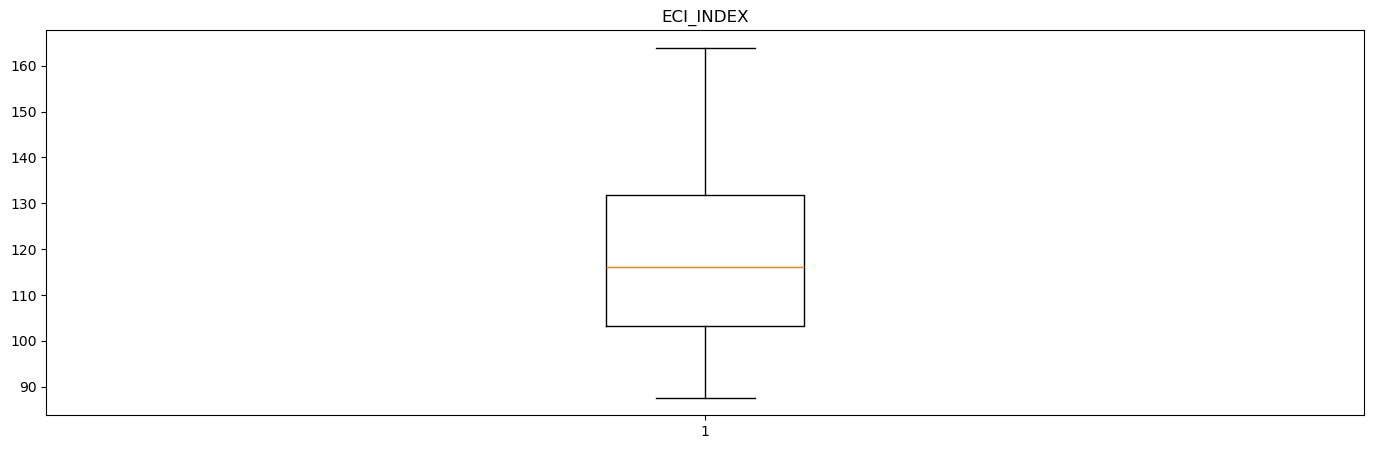

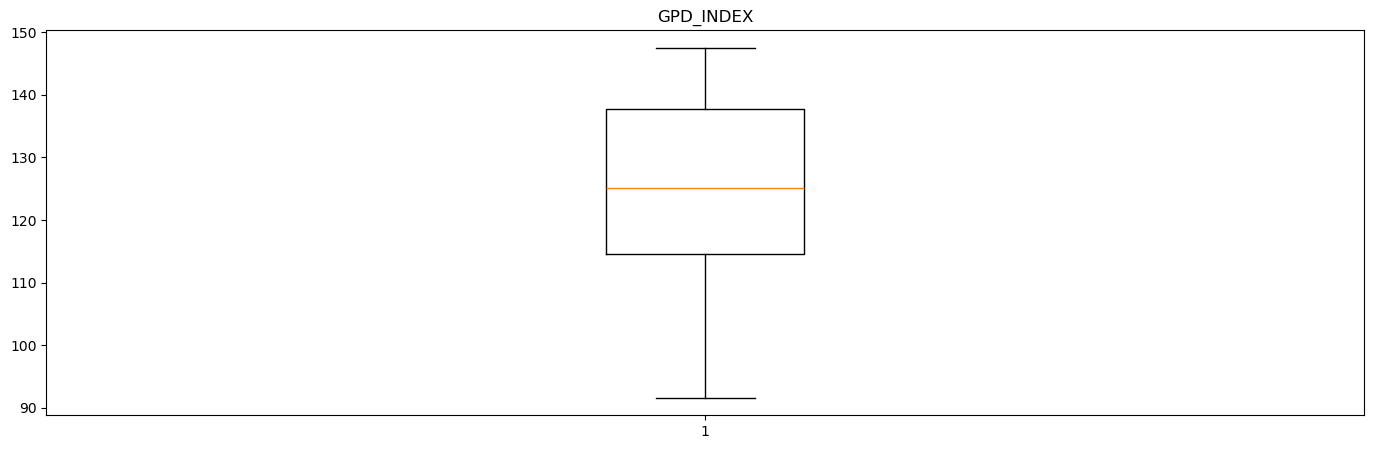

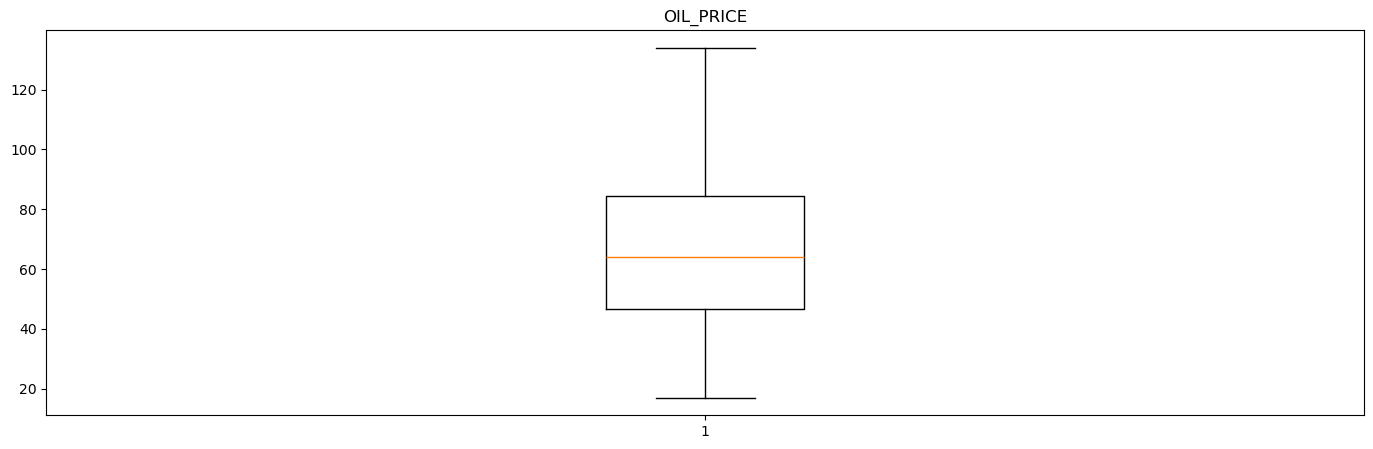

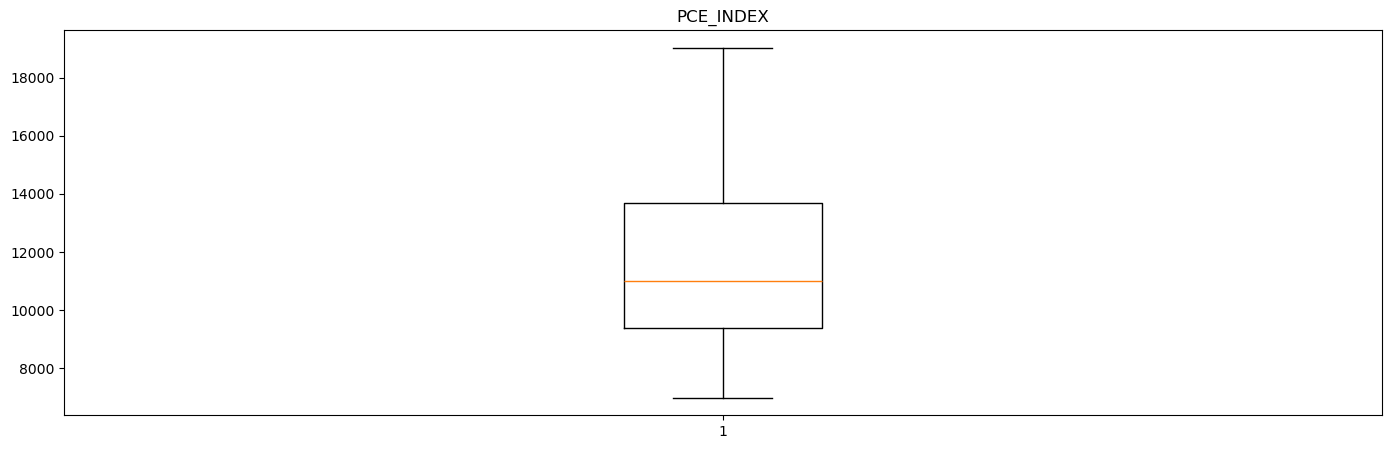

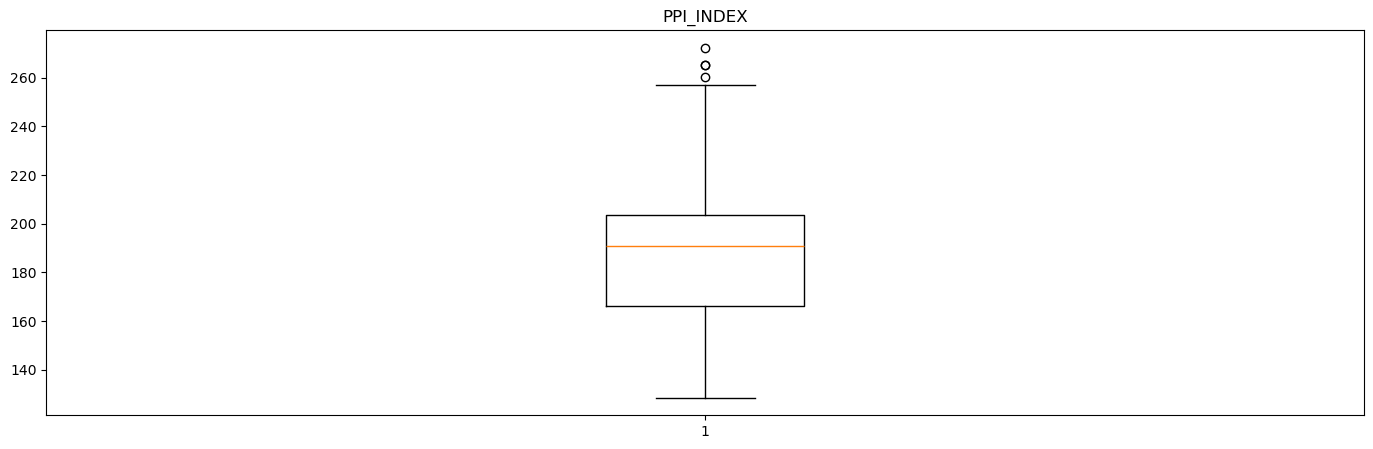

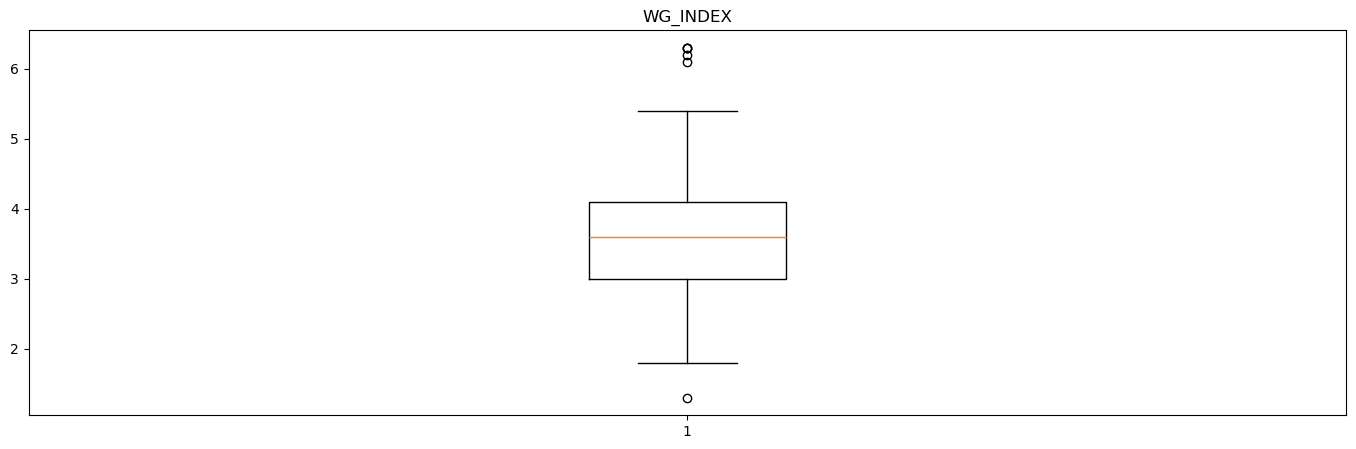

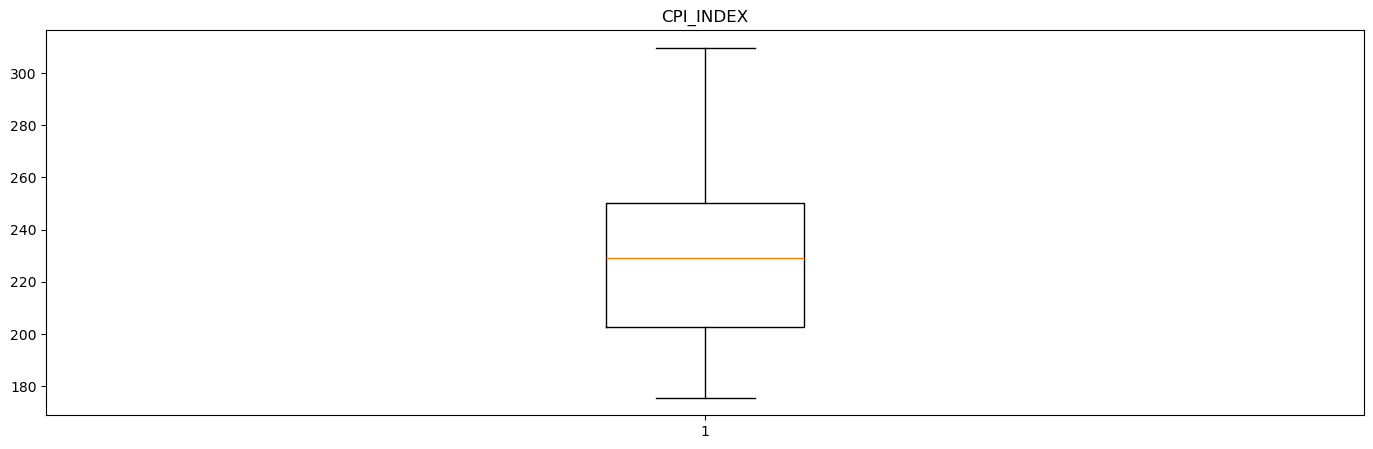

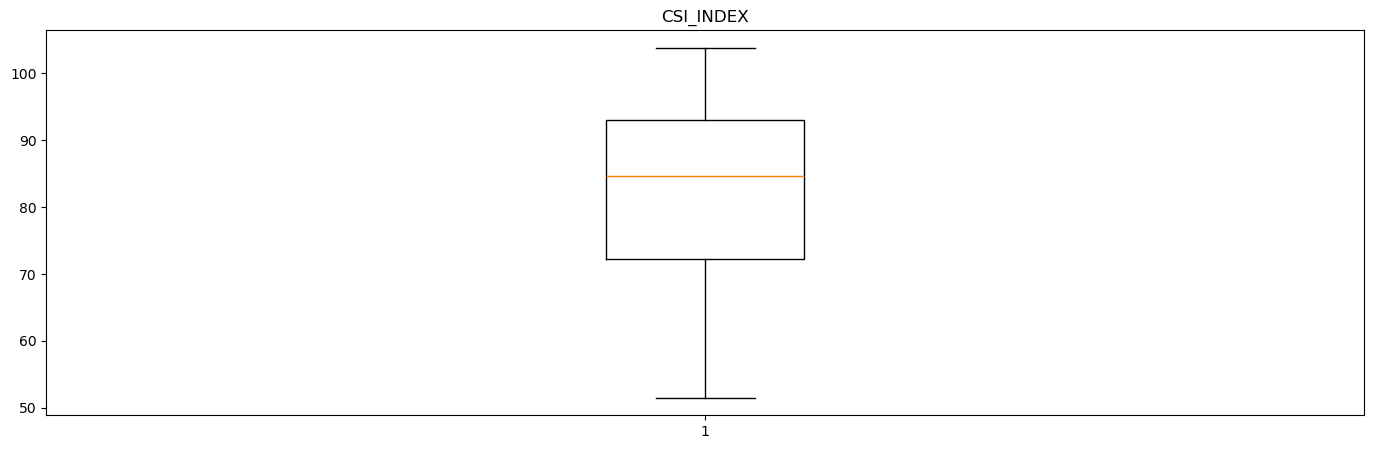

In [137]:
# plot box plot
for column in df.columns:
    plt.figure(figsize=(17, 5))
    plt.boxplot(df[column])
    plt.title(column.upper())
    plt.show()

In [138]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [139]:
for column in df.columns:
    print(column.upper())
    print(check_outliers(df, column))
    print(len(check_outliers(df, column)))
    print('*' * 100)
    print()

ECI_INDEX
Empty DataFrame
Columns: [eci_index, gpd_index, oil_price, pce_index, ppi_index, wg_index, cpi_index, csi_index]
Index: []
0
****************************************************************************************************

GPD_INDEX
Empty DataFrame
Columns: [eci_index, gpd_index, oil_price, pce_index, ppi_index, wg_index, cpi_index, csi_index]
Index: []
0
****************************************************************************************************

OIL_PRICE
Empty DataFrame
Columns: [eci_index, gpd_index, oil_price, pce_index, ppi_index, wg_index, cpi_index, csi_index]
Index: []
0
****************************************************************************************************

PCE_INDEX
Empty DataFrame
Columns: [eci_index, gpd_index, oil_price, pce_index, ppi_index, wg_index, cpi_index, csi_index]
Index: []
0
****************************************************************************************************

PPI_INDEX
            eci_index  gpd_index   oil_pri

In [140]:
check_outliers(df, 'wg_index')['wg_index']

DATE
2010-10-01    1.3
2022-01-01    6.1
2022-04-01    6.3
2022-07-01    6.3
2022-10-01    6.3
2023-01-01    6.2
Name: wg_index, dtype: float64

In [141]:
check_outliers(df, 'ppi_index')['ppi_index']

DATE
2022-04-01    265.310
2022-07-01    272.274
2022-10-01    265.061
2023-01-01    260.227
Name: ppi_index, dtype: float64

### 3. DIVIDE THE DF INTO ONE QUATERLY DATAFRAME AND ONE YEARLY DATAFRAME AND NORMALIZATION

In [142]:
df

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
DATE,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.000,5.3,175.600,94.7
2001-04-01,88.4,97.8,27.453810,7004.2,136.400,5.4,176.400,88.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.400,5.1,177.400,92.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.300,5.1,177.600,82.7
2002-01-01,90.7,91.6,19.607391,7184.6,128.500,4.8,177.700,93.0
...,...,...,...,...,...,...,...,...
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,6.2,300.356,64.9
2023-04-01,158.7,140.3,79.126500,18363.8,256.908,5.1,303.032,63.7
2023-07-01,160.4,139.4,75.766667,18595.4,253.835,5.3,304.628,71.5


In [143]:
sns.scatterplot(data=cpi_and_csi_yearly, x='csi_index', y='cpi_index')
plt.title('CSI vs CPI Relationship')
plt.xlabel('CPI Index')
plt.ylabel('CSI Index')
plt.show()

NameError: name 'cpi_and_csi_yearly' is not defined

In [ ]:
cpi_and_csi = df[['cpi_index', 'csi_index']]

In [ ]:
#resample to yearly
cpi_and_csi_yearly = cpi_and_csi.resample('Y').mean()

In [ ]:
cpi_and_csi_yearly

,cpi_index,csi_index
DATE,,
2001-12-31,176.75000,89.550
2002-12-31,179.55000,88.675
2003-12-31,183.60000,87.225
2004-12-31,188.40000,96.600
2005-12-31,194.82500,88.475
2006-12-31,201.20000,89.225
2007-12-31,206.53350,88.825
2008-12-31,215.53175,64.950
2009-12-31,213.96925,65.725


In [ ]:
cpi_and_csi_yearly['shifted'] = cpi_and_csi_yearly['cpi_index'].shift(1)

In [ ]:
cpi_and_csi_yearly['inflation'] = (cpi_and_csi_yearly['cpi_index'] - cpi_and_csi_yearly['shifted']) / cpi_and_csi_yearly['shifted'] * 100

In [ ]:
cpi_and_csi_yearly.dropna(inplace=True)

In [ ]:
cpi_and_csi_yearly

,cpi_index,csi_index,shifted,inflation
DATE,,,,
2002-12-31,179.55000,88.675,176.75000,1.584158
2003-12-31,183.60000,87.225,179.55000,2.255639
2004-12-31,188.40000,96.600,183.60000,2.614379
2005-12-31,194.82500,88.475,188.40000,3.410297
2006-12-31,201.20000,89.225,194.82500,3.272167
2007-12-31,206.53350,88.825,201.20000,2.650845
2008-12-31,215.53175,64.950,206.53350,4.356799
2009-12-31,213.96925,65.725,215.53175,-0.724951
2010-12-31,217.88275,70.525,213.96925,1.829001


In [ ]:
cpi_and_csi_yearly[['csi_index', 'inflation']].corr()

,csi_index,inflation
csi_index,1.000000,-0.382637
inflation,-0.382637,1.000000


In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
print(pearsonr(cpi_and_csi_yearly['cpi_index'], cpi_and_csi_yearly['csi_index']))

PearsonRResult(statistic=-0.3031469648123646, pvalue=0.15969136597008074)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [ ]:
cpi_and_csi_yearly['csi_index_normalized'] = mm.fit_transform(cpi_and_csi_yearly[['csi_index']])

In [ ]:
cpi_and_csi_yearly[['csi_index_normalized', 'inflation']].corr()

,csi_index_normalized,inflation
csi_index_normalized,1.000000,-0.382637
inflation,-0.382637,1.000000


In [ ]:
print(pearsonr(cpi_and_csi_yearly['inflation'], cpi_and_csi_yearly['csi_index_normalized']))

PearsonRResult(statistic=-0.3826366593653328, pvalue=0.07154278749804519)


In [ ]:
#quaterly

In [ ]:
cpi_and_csi.corr()

,cpi_index,csi_index
cpi_index,1.00000,-0.31339
csi_index,-0.31339,1.00000


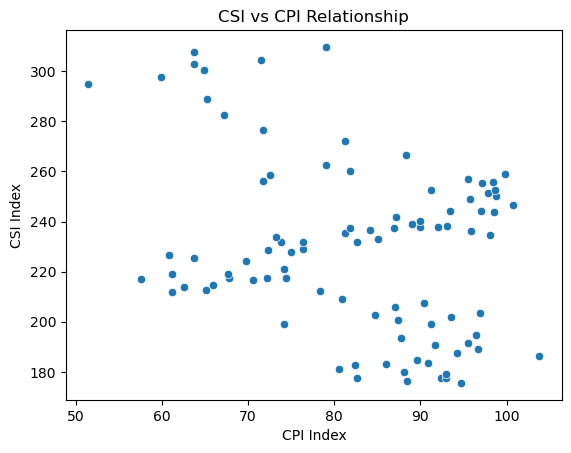

In [ ]:
sns.scatterplot(data=cpi_and_csi, x='csi_index', y='cpi_index')
plt.title('CSI vs CPI Relationship')
plt.xlabel('CPI Index')
plt.ylabel('CSI Index')
plt.show()

In [ ]:
print(pearsonr(cpi_and_csi['cpi_index'], cpi_and_csi['csi_index']))

PearsonRResult(statistic=-0.3133897054409837, pvalue=0.002222311084758743)


<Axes: xlabel='DATE'>

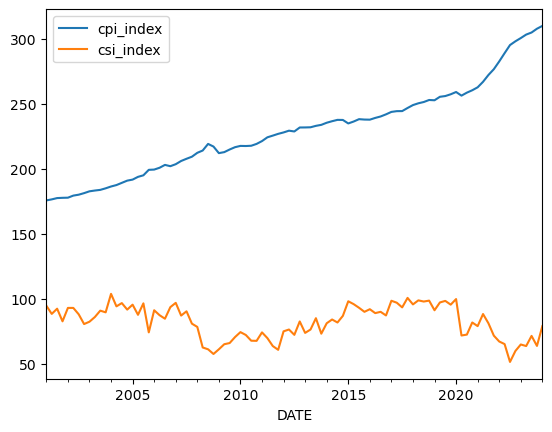

In [ ]:
cpi_and_csi.plot()

In [ ]:
cpi_and_csi['cpi_index_normalized'] = mm.fit_transform(cpi_and_csi[['cpi_index']])

/var/folders/nz/9n23x2r97nq7367gvnsygb5w0000gn/T/ipykernel_4502/2866797692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_and_csi['cpi_index_normalized'] = mm.fit_transform(cpi_and_csi[['cpi_index']])


In [ ]:
cpi_and_csi['csi_index_normalized'] = mm.fit_transform(cpi_and_csi[['csi_index']])

/var/folders/nz/9n23x2r97nq7367gvnsygb5w0000gn/T/ipykernel_4502/261146968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_and_csi['csi_index_normalized'] = mm.fit_transform(cpi_and_csi[['csi_index']])


<Figure size 2400x800 with 0 Axes>

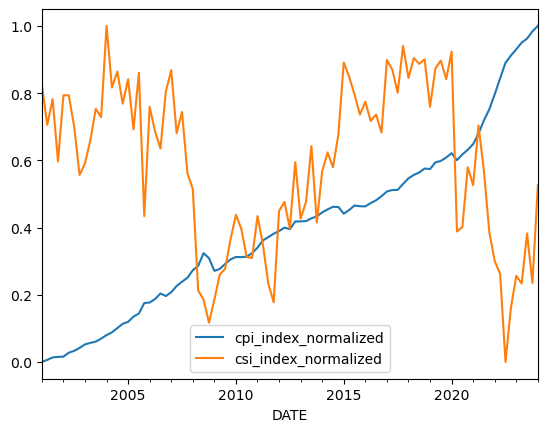

In [ ]:
plt.figure(figsize=(24, 8))

cpi_and_csi[['cpi_index_normalized', 'csi_index_normalized']].plot()

plt.show()

/Users/anbschool0015/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

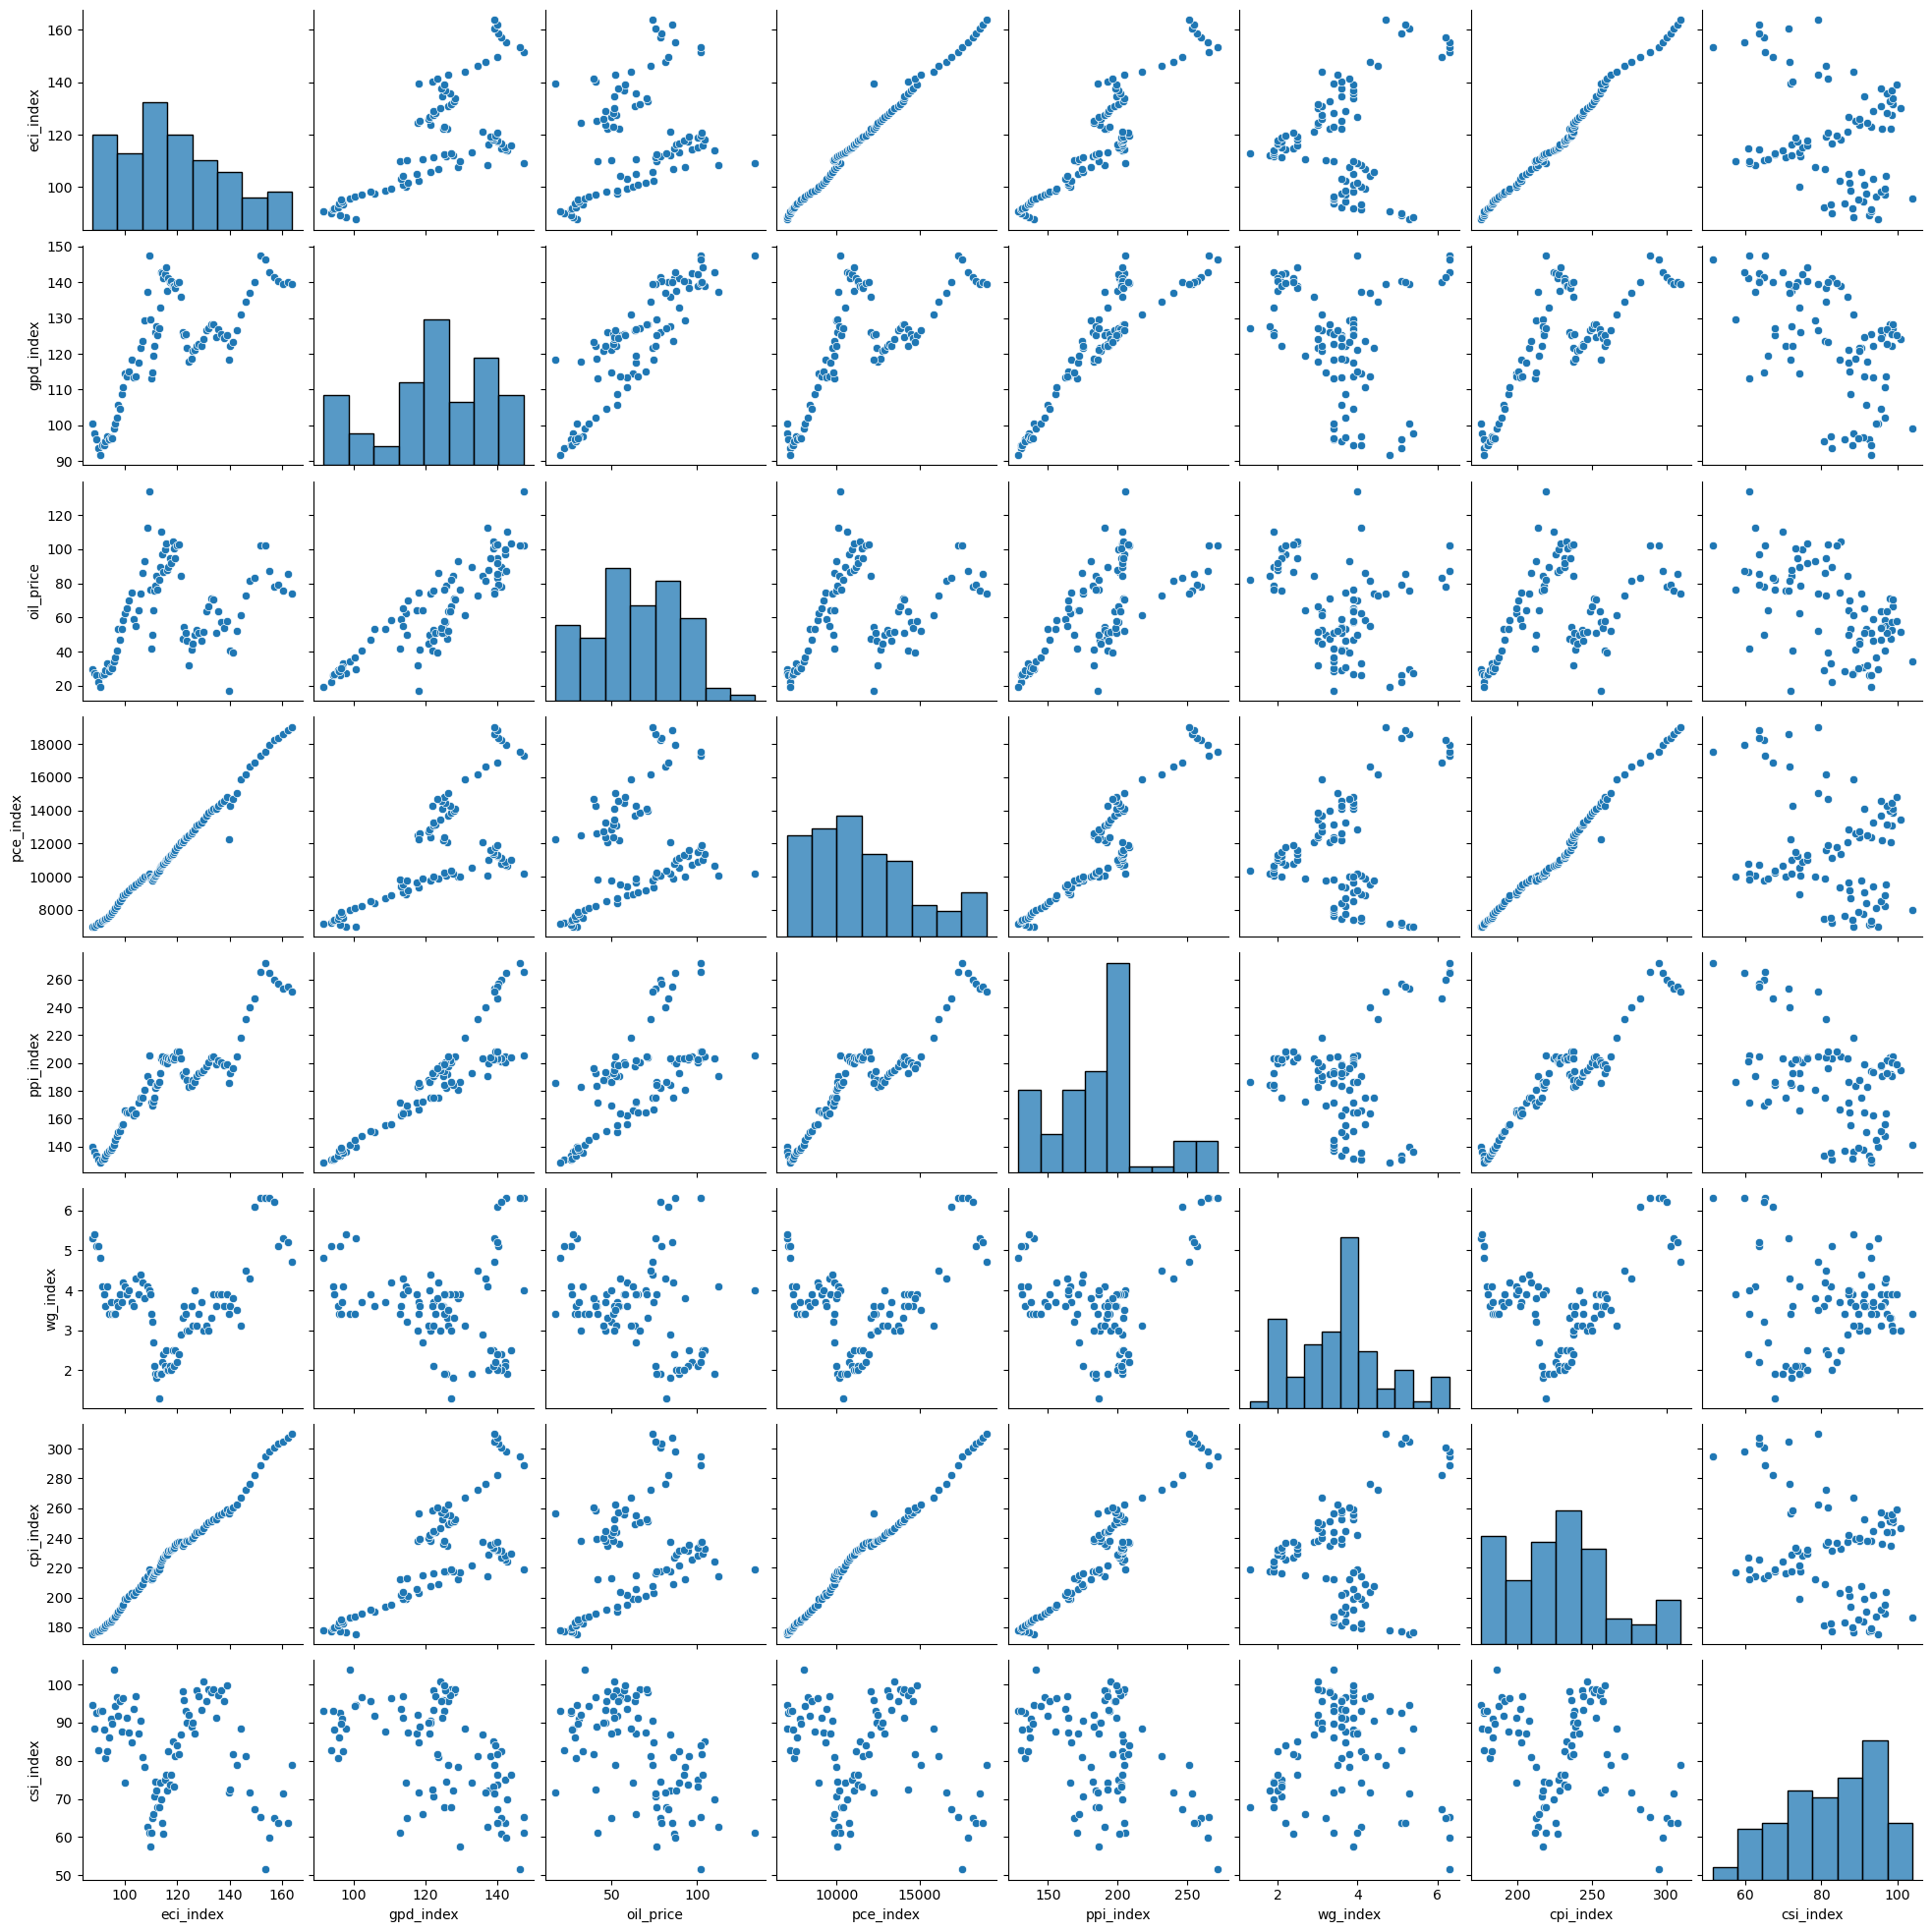

In [ ]:
sns.pairplot(df)

plt.plot()

In [ ]:
df.corr()

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
eci_index,1.000000,0.697173,0.326078,0.992984,0.913650,0.247082,0.994597,-0.267248
gpd_index,0.697173,1.000000,0.867337,0.693572,0.894296,-0.150980,0.751370,-0.524081
oil_price,0.326078,0.867337,1.000000,0.343119,0.646724,-0.220385,0.400988,-0.550574
pce_index,0.992984,0.693572,0.343119,1.000000,0.922165,0.301852,0.991888,-0.245830
ppi_index,0.913650,0.894296,0.646724,0.922165,1.000000,0.178967,0.946350,-0.473221
wg_index,0.247082,-0.150980,-0.220385,0.301852,0.178967,1.000000,0.237421,-0.043396
cpi_index,0.994597,0.751370,0.400988,0.991888,0.946350,0.237421,1.000000,-0.313390
csi_index,-0.267248,-0.524081,-0.550574,-0.245830,-0.473221,-0.043396,-0.313390,1.000000


In [ ]:
highly_corr = df[['eci_index', 'gpd_index', 'pce_index', 'ppi_index', 'cpi_index']] # group them

In [ ]:
highly_corr.corr()

,eci_index,gpd_index,pce_index,ppi_index,cpi_index
eci_index,1.000000,0.697173,0.992984,0.913650,0.994597
gpd_index,0.697173,1.000000,0.693572,0.894296,0.751370
pce_index,0.992984,0.693572,1.000000,0.922165,0.991888
ppi_index,0.913650,0.894296,0.922165,1.000000,0.946350
cpi_index,0.994597,0.751370,0.991888,0.946350,1.000000


<Axes: xlabel='DATE'>

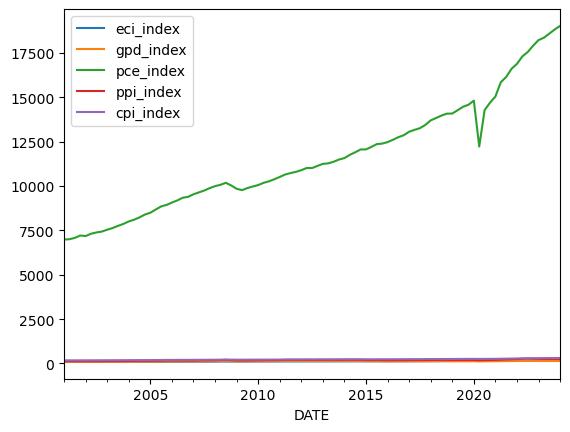

In [ ]:
highly_corr.plot()

In [ ]:
highly_corr['pce_index_normalized'] = mm.fit_transform(highly_corr[['pce_index']])

/var/folders/nz/9n23x2r97nq7367gvnsygb5w0000gn/T/ipykernel_4502/3784703780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_corr['pce_index_normalized'] = mm.fit_transform(highly_corr[['pce_index']])


<Axes: xlabel='DATE'>

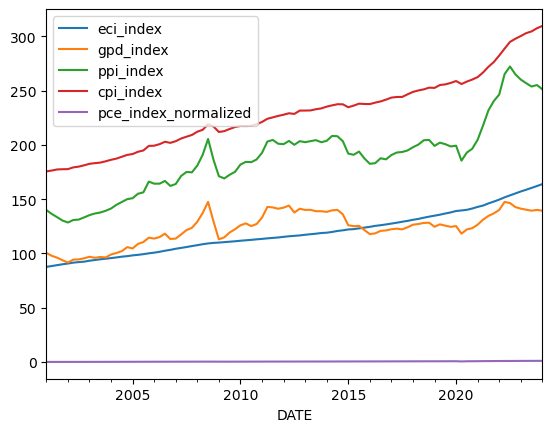

In [ ]:
highly_corr.iloc[:, [0,1,3,4,5]].plot()

In [ ]:
for i in highly_corr.columns.drop('cpi_index'):
    corr, _ = pearsonr(highly_corr[i], highly_corr['cpi_index'])
    print(f"Pearson correlation between {i} and cpi_index: {corr:.4f}")

Pearson correlation between eci_index and cpi_index: 0.9946
Pearson correlation between gpd_index and cpi_index: 0.7514
Pearson correlation between pce_index and cpi_index: 0.9919
Pearson correlation between ppi_index and cpi_index: 0.9464
Pearson correlation between pce_index_normalized and cpi_index: 0.9919


In [ ]:
highly_corr

,eci_index,gpd_index,pce_index,ppi_index,cpi_index,pce_index_normalized
DATE,,,,,,
2001-01-01,87.6,100.5,6987.4,140.000,175.600,0.000000
2001-04-01,88.4,97.8,7004.2,136.400,176.400,0.001395
2001-07-01,89.2,96.1,7082.3,133.400,177.400,0.007882
2001-10-01,90.0,93.7,7212.9,130.300,177.600,0.018728
2002-01-01,90.7,91.6,7184.6,128.500,177.700,0.016378
...,...,...,...,...,...,...
2023-01-01,157.1,141.3,18229.6,260.227,300.356,0.933691
2023-04-01,158.7,140.3,18363.8,256.908,303.032,0.944837
2023-07-01,160.4,139.4,18595.4,253.835,304.628,0.964072


<Axes: xlabel='DATE'>

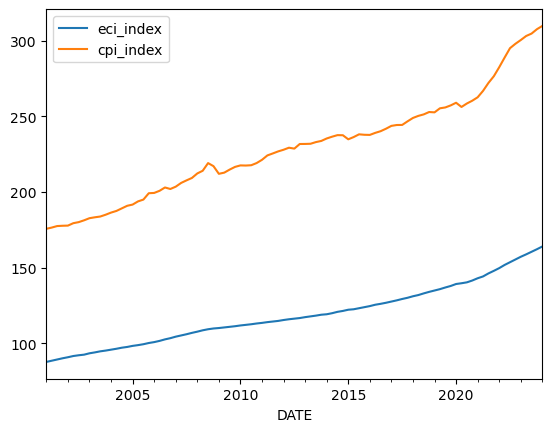

In [ ]:
highly_corr[['eci_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

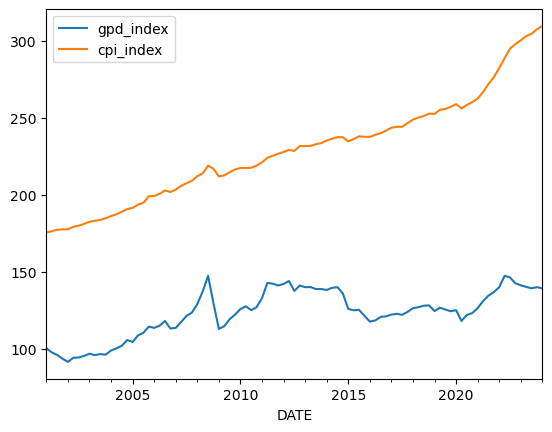

In [ ]:
highly_corr[['gpd_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

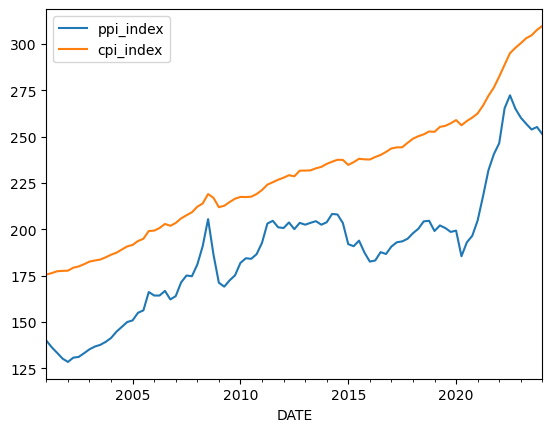

In [ ]:
highly_corr[['ppi_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

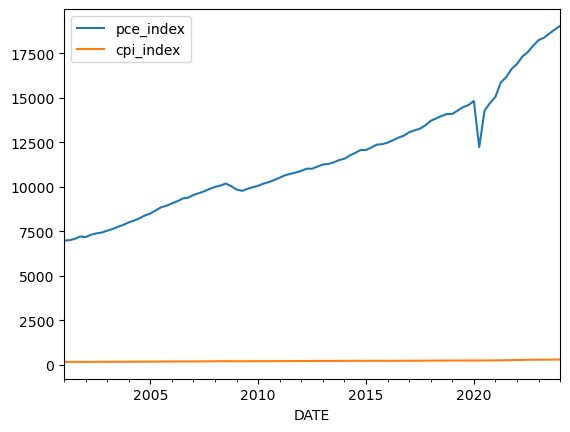

In [ ]:
highly_corr[['pce_index', 'cpi_index']].plot()

In [ ]:
#yearly

df_yearly = df.resample('Y').mean()

/Users/anbschool0015/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

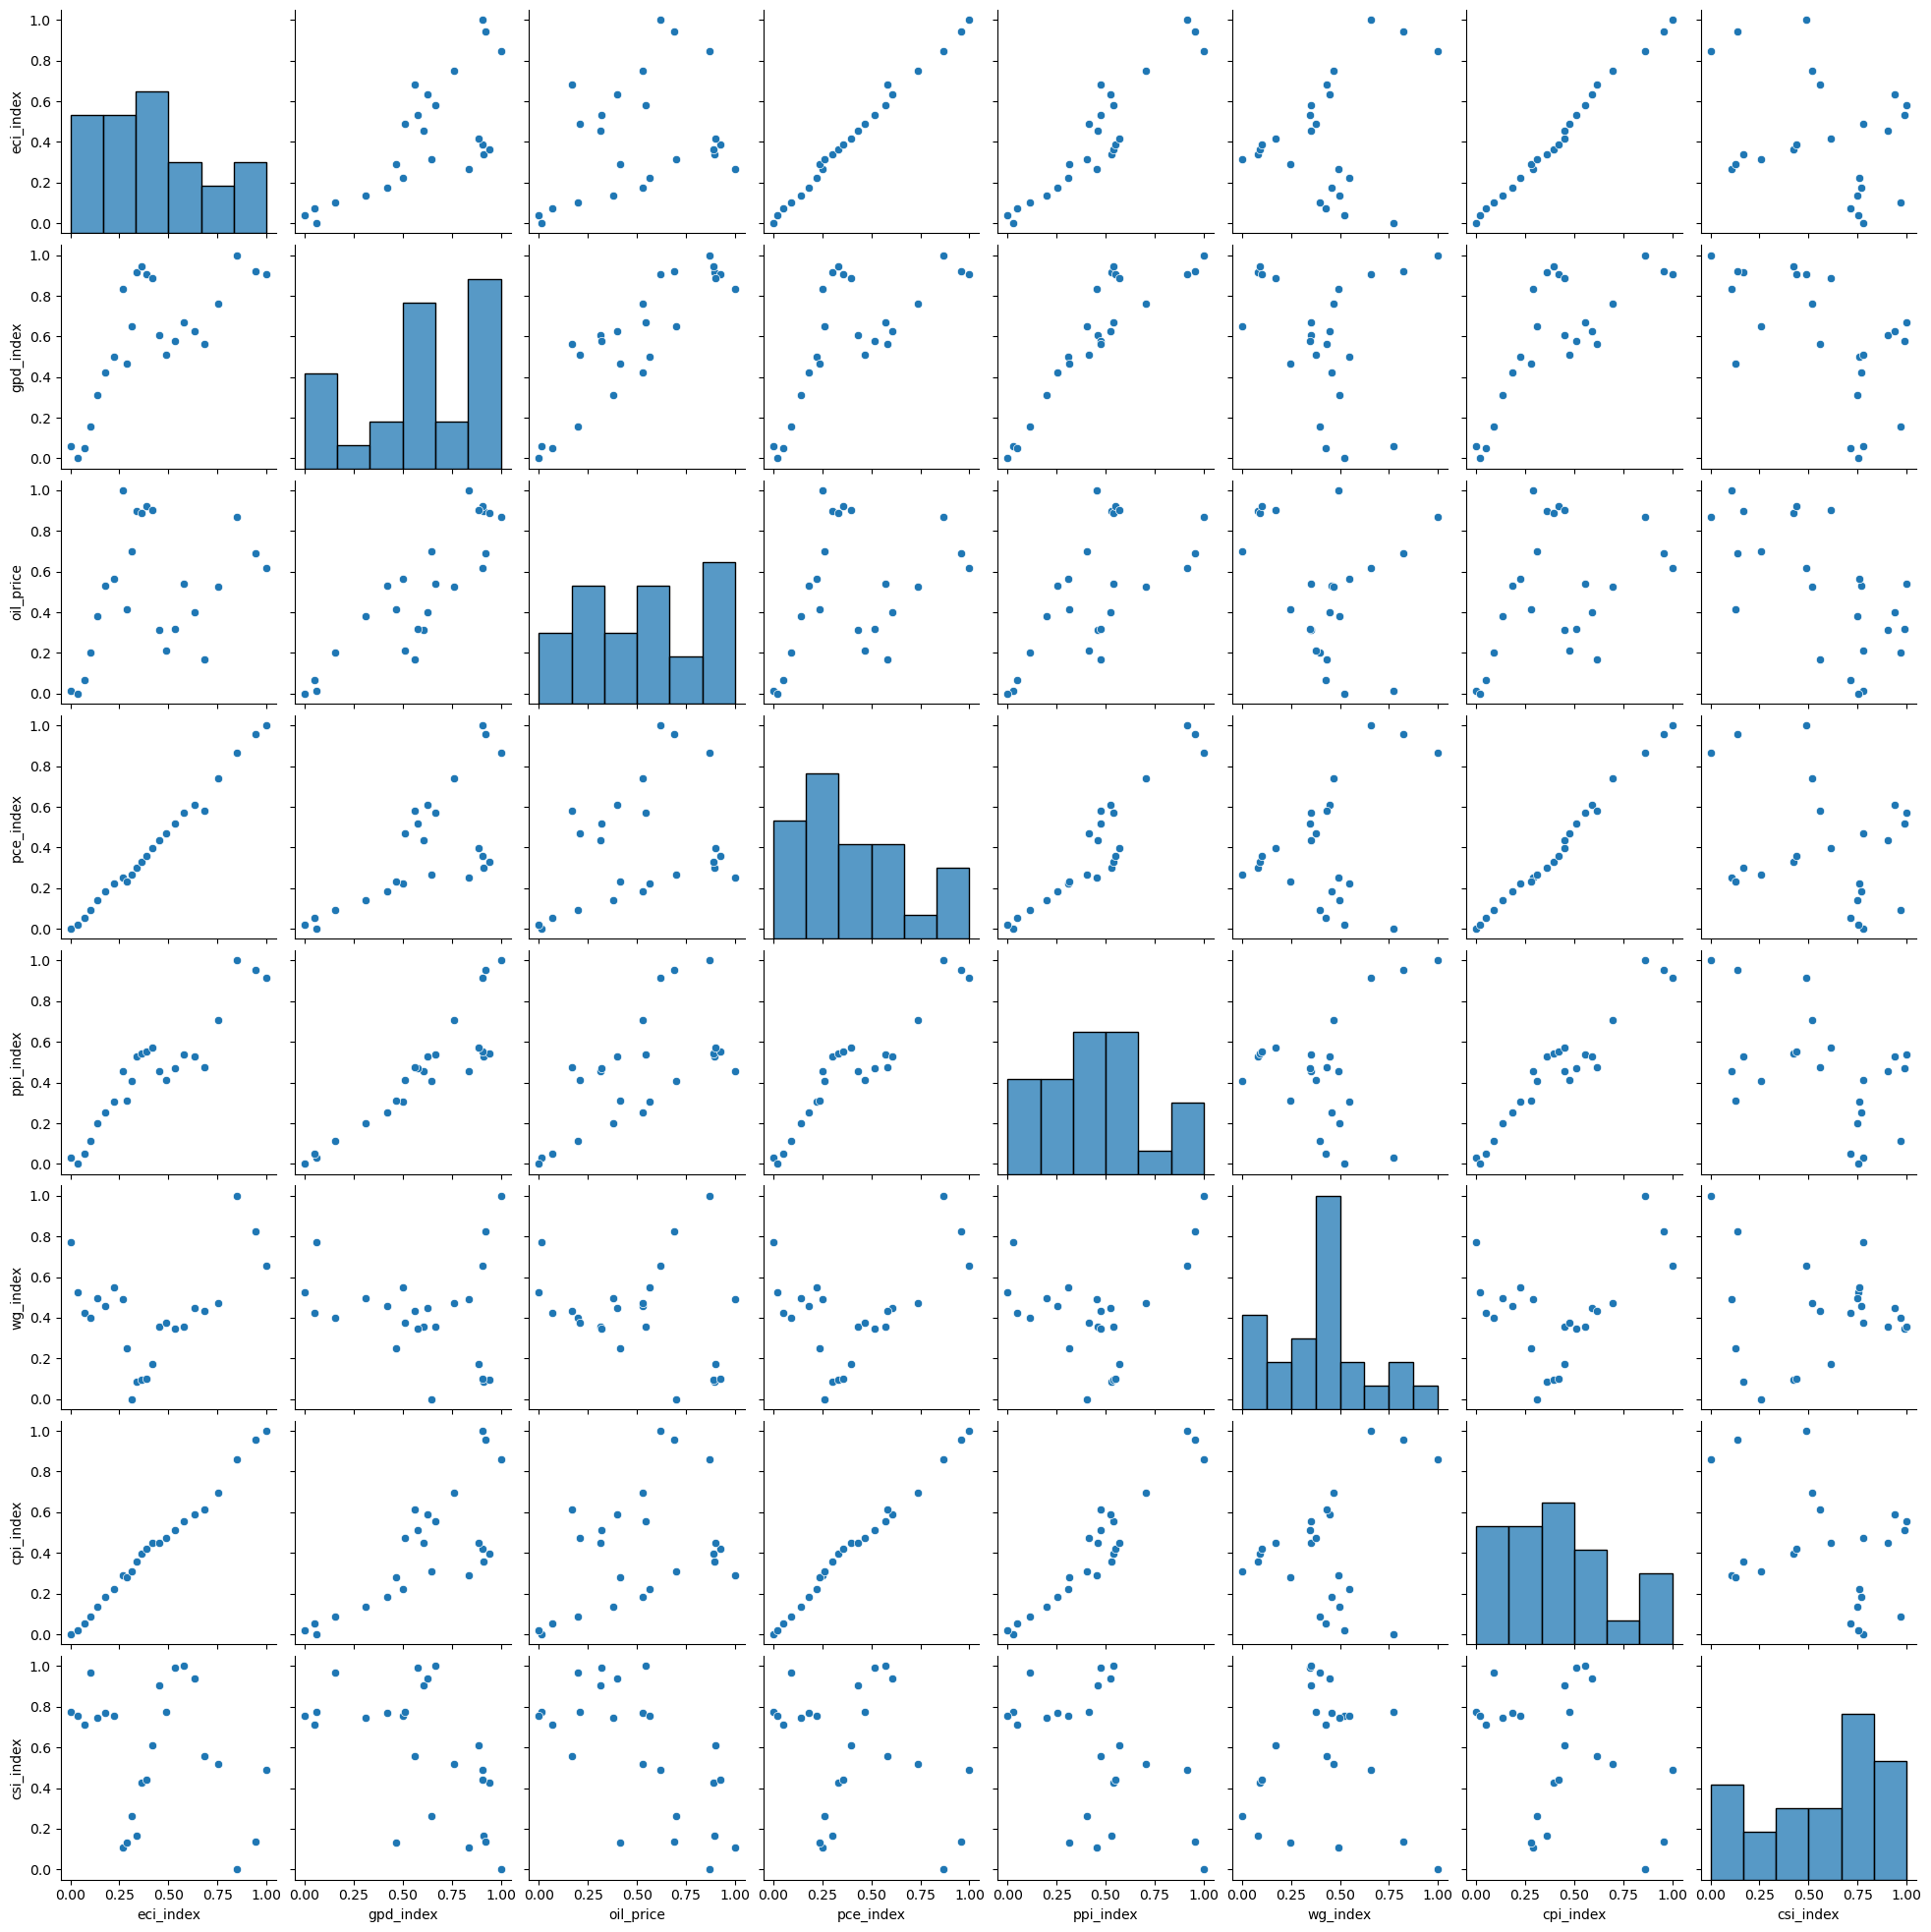

In [ ]:
sns.pairplot(df_yearly_1)

plt.plot()

In [ ]:
df_yearly_1 = df_yearly.copy()

for column in df_yearly_1.columns:
    df_yearly_1[column] = mm.fit_transform(df_yearly_1[[column]])

In [ ]:
df_yearly_1.corr()

,eci_index,gpd_index,oil_price,pce_index,ppi_index,wg_index,cpi_index,csi_index
eci_index,1.000000,0.713999,0.340671,0.996106,0.927937,0.301075,0.995724,-0.283826
gpd_index,0.713999,1.000000,0.872990,0.707886,0.894933,-0.126138,0.760252,-0.564784
oil_price,0.340671,0.872990,1.000000,0.347576,0.642643,-0.234086,0.407858,-0.634973
pce_index,0.996106,0.707886,0.347576,1.000000,0.933843,0.350592,0.994951,-0.271419
ppi_index,0.927937,0.894933,0.642643,0.933843,1.000000,0.221131,0.954251,-0.495669
wg_index,0.301075,-0.126138,-0.234086,0.350592,0.221131,1.000000,0.291517,-0.052495
cpi_index,0.995724,0.760252,0.407858,0.994951,0.954251,0.291517,1.000000,-0.327248
csi_index,-0.283826,-0.564784,-0.634973,-0.271419,-0.495669,-0.052495,-0.327248,1.000000


<Axes: xlabel='DATE'>

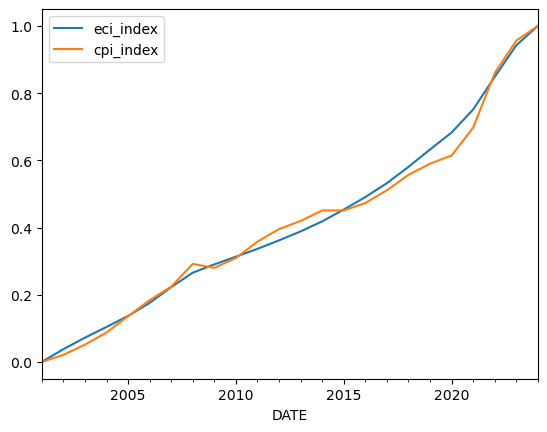

In [ ]:
df_yearly_1[['eci_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

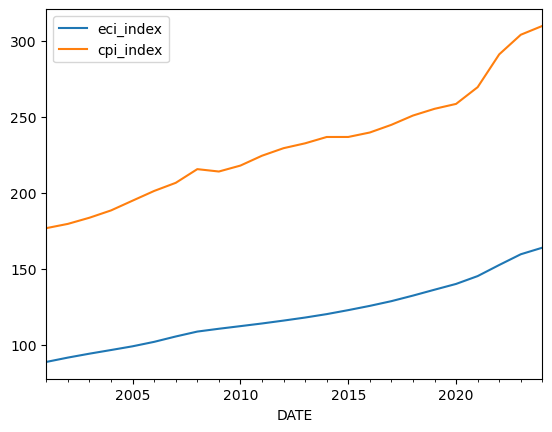

In [ ]:
df_yearly[['eci_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

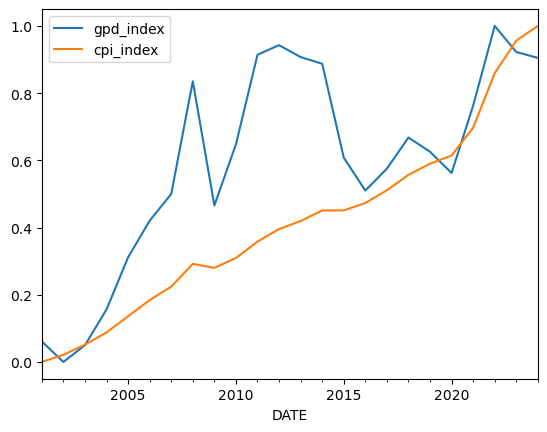

In [ ]:
df_yearly_1[['gpd_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

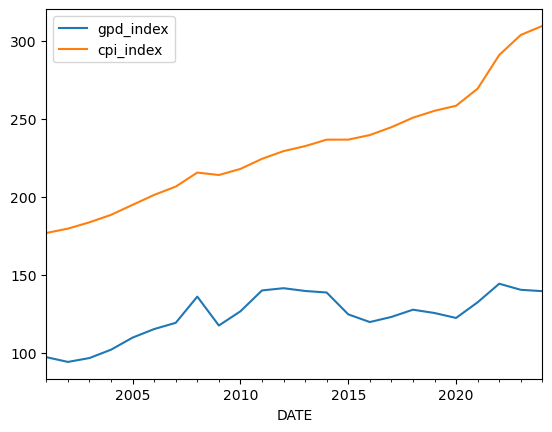

In [ ]:
df_yearly[['gpd_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

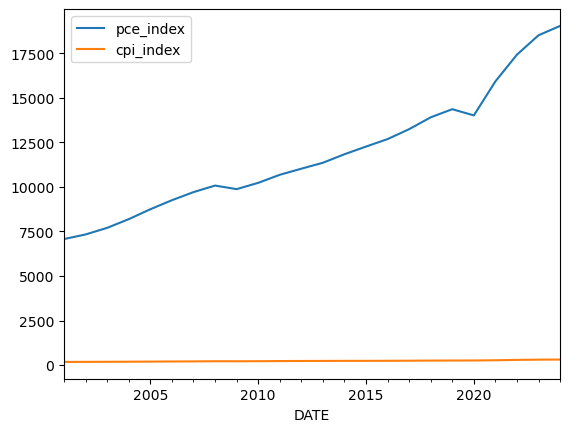

In [ ]:
df_yearly[['pce_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

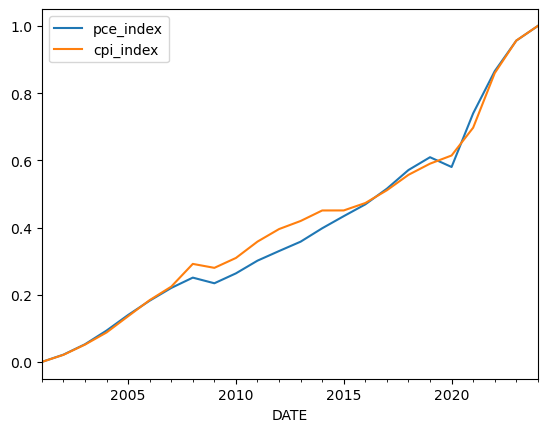

In [ ]:
df_yearly_1[['pce_index', 'cpi_index']].plot()

<Axes: xlabel='DATE'>

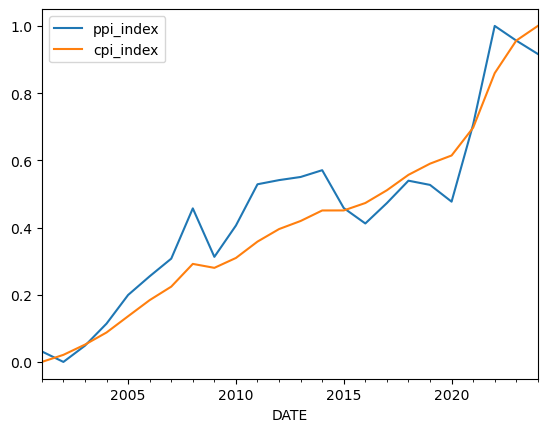

In [ ]:
df_yearly_1[['ppi_index', 'cpi_index']].plot()

In [ ]:
# non-normalized

df_yearly